In [153]:
from sklearn.linear_model import LinearRegression  # 선형회귀
from sklearn.preprocessing import PolynomialFeatures # 다항특성을 만들어주는 라이브러리
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

데이터 피처 설명
- pclass : Passenger Class, 승객 등급
- survived : 생존 여부 : target 값이 됨.
- name : 승객 이름
- sex : 승객 성별
- age : 승객 나이
- sibsp : 탑승 한 형제/배우자 수
- parch : 탑승 한 부모/자녀 수
- ticket : 티켓 번호
- fare : 승객 지불 요금
- cabin : 선실 이름
- embarked : 승선항 (C = 쉘 부르그, Q = 퀸즈타운, S = 사우스 햄튼)
- body : 사망자 확인 번호 - 분석과정에서 제외해야 함. 머신러닝에 100% 영향을 미침.
- home.dest : 고향/목적지

In [154]:
df_train = pd.read_csv('titanic_train.csv')
df_test = pd.read_csv('titanic_test.csv')

name, cabin 데이터 추가

In [155]:
# 데이터 중에 name, ticket, cabin, body, home.dest 제거
df_train = df_train.drop(['ticket', 'body', 'home.dest'], axis=1)
df_train

df_test = df_test.drop(['ticket', 'body', 'home.dest'], axis=1)
df_test

,pclass,survived,name,sex,age,sibsp,parch,fare,cabin,embarked
0,3,0,"Rekic, Mr. Tido",male,38.0,0,0,7.8958,NaN,S
1,2,1,"Phillips, Miss. Alice Frances Louisa",female,21.0,0,1,21.0000,NaN,S
2,2,0,"Jacobsohn, Mr. Sidney Samuel",male,42.0,1,0,27.0000,NaN,S
3,3,0,"Risien, Mr. Samuel Beard",male,NaN,0,0,14.5000,NaN,S
4,2,0,"Denbury, Mr. Herbert",male,25.0,0,0,31.5000,NaN,S
...,...,...,...,...,...,...,...,...,...,...
388,3,0,"Karlsson, Mr. Julius Konrad Eugen",male,33.0,0,0,7.8542,NaN,S
389,2,1,"Ware, Mrs. John James (Florence Louise Long)",female,31.0,0,0,21.0000,NaN,S
390,3,1,"O'Keefe, Mr. Patrick",male,NaN,0,0,7.7500,NaN,Q
391,3,0,"Tobin, Mr. Roger",male,NaN,0,0,7.7500,F38,Q


In [156]:
# 데이터 전처리
# df_train['embarked'] # str

# age 데이터의 평균값으로 NaN 데이터를 처리
# 결측치에 넣을 평균값 : train, test 세트에 모두 적용
replace_mean = df_train[df_train['age']>0]['age'].mean()
df_train['age'] = df_train['age'].fillna(replace_mean)
df_test['age'] = df_test['age'].fillna(replace_mean) # test 평균값은 train의 값을 넣어줘

# embark : 결측값 2개
# 데이터 중 가장 많이 나온 결과의 값으로 대체
embarked_mod = df_train['embarked'].value_counts().index[0]
df_train['embarked'] = df_train['embarked'].fillna(embarked_mod)
df_test['embarked'] = df_test['embarked'].fillna(embarked_mod)

In [157]:
# train, test 세트 합치기
whole_df = pd.concat([df_train, df_test])

In [158]:
train_idx_num = len(df_train)

In [159]:
whole_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 392
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1309 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   fare      1309 non-null   float64
 8   cabin     295 non-null    object 
 9   embarked  1309 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 112.5+ KB


In [160]:
# cabin 데이터 처리
# cabin : 선실 이름
whole_df['cabin'].value_counts().head()

cabin
C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
F4                 4
B96 B98            4
Name: count, dtype: int64

In [161]:
# 결측체 데이터를 x로 대체
whole_df['cabin'] = whole_df['cabin'].fillna('X')

In [162]:
whole_df.info() # 결측치가 없어진 것을 확인

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 392
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1309 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   fare      1309 non-null   float64
 8   cabin     1309 non-null   object 
 9   embarked  1309 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 112.5+ KB


In [163]:
whole_df['cabin'].str[0]

0      X
1      X
2      X
3      X
4      X
      ..
388    X
389    X
390    X
391    F
392    X
Name: cabin, Length: 1309, dtype: object

In [164]:
# cabin의 데이터 앞 첫글자를 저장
whole_df['cabin'] = whole_df['cabin'].str[0]

In [165]:
whole_df['cabin'].value_counts()

cabin
X    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: count, dtype: int64

In [166]:
# 항목 중 데이터가 적은 수는 X로 대체
whole_df['cabin'] = whole_df['cabin'].replace({'G':'X','T':'X'})


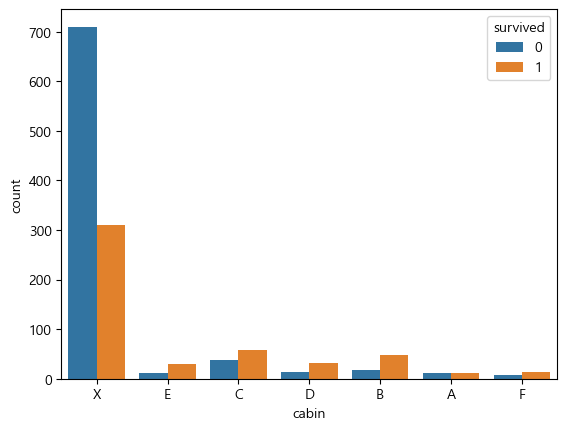

In [167]:
ax = sns.countplot(x='cabin', hue='survived', data=whole_df)

In [168]:
# name 피처 처리
whole_df['name'].head()

0    Mellinger, Miss. Madeleine Violet
1                    Wells, Miss. Joan
2       Duran y More, Miss. Florentina
3                   Scanlan, Mr. James
4         Bradley, Miss. Bridget Delia
Name: name, dtype: object

In [169]:
whole_df['name'].str.split(',')


0                 [Mellinger,  Miss. Madeleine Violet]
1                                 [Wells,  Miss. Joan]
2                    [Duran y More,  Miss. Florentina]
3                                [Scanlan,  Mr. James]
4                      [Bradley,  Miss. Bridget Delia]
                            ...                       
388               [Karlsson,  Mr. Julius Konrad Eugen]
389    [Ware,  Mrs. John James (Florence Louise Long)]
390                            [O'Keefe,  Mr. Patrick]
391                                [Tobin,  Mr. Roger]
392                            [Daniels,  Miss. Sarah]
Name: name, Length: 1309, dtype: object

In [170]:
# , 기준으로 분리해서 뒤에 부분을 저장
whole_df['name'] = whole_df['name'].str.split(',').str[1]

In [171]:
# , 기준으로 분리해서 앞에 부분을 저장
whole_df['name'] = whole_df['name'].str.split(',').str[0].str.strip()

In [172]:
whole_df['name'].value_counts()

name
Mr. John                            13
Mr. William                         10
Mr. Patrick                         10
Mr. James                            9
Miss. Mary                           7
                                    ..
Mr. Iisakki Antino Aijo              1
Mrs. (Mary D Kingcome)               1
Miss. Margaret Marcella "Maggie"     1
Mr. Edwin                            1
Miss. Sarah                          1
Name: count, Length: 1142, dtype: int64

In [173]:
whole_df['name'].unique()


array(['Miss. Madeleine Violet', 'Miss. Joan', 'Miss. Florentina', ...,
       'Mrs. John James (Florence Louise Long)', 'Mr. Roger',
       'Miss. Sarah'], dtype=object)

In [174]:
# 호칭에 따른 사회적 지위를 파악
grade_dict = {'A': ['Rev', 'Col', 'Major', 'Dr', 'Capt', 'Sir'], # 명예직을 나타냅니다.
              'B': ['Ms', 'Mme', 'Mrs', 'Dona'], # 여성을 나타냅니다.
              'C': ['Jonkheer', 'the Countess'], # 귀족이나 작위를 나타냅니다.
              'D': ['Mr', 'Don'], # 남성을 나타냅니다.
              'E': ['Master'], # 젊은남성을 나타냅니다.
              'F': ['Miss', 'Mlle', 'Lady']} # 젊은 여성을 나타냅니다.

In [175]:
# 함수를 적용해서 데이터 적용
def give_grade(x):
    for key, value in grade_dict.items():
        for title in value :
            if x == title :
                return key
            
    # return 'G'
whole_df['name'] = whole_df['name'].apply(lambda x:give_grade(x))
    

In [176]:
whole_df['name']

0      None
1      None
2      None
3      None
4      None
       ... 
388    None
389    None
390    None
391    None
392    None
Name: name, Length: 1309, dtype: object

In [177]:
# 원핫인코딩
whole_df_encoded = pd.get_dummies(whole_df)
train_input = whole_df_encoded[:train_idx_num]


In [178]:
# train_test 세트 분리
# train : 916
# whole_df_encoded.loc[:, whole_df_encoded.columns != 'survived']

train_input = whole_df_encoded.iloc[:train_idx_num, whole_df_encoded.columns != 'survived']
train_target = whole_df_encoded['survived'][:train_idx_num]
train_target.count()

# target : 393
test_input = whole_df_encoded.iloc[train_idx_num:, whole_df_encoded.columns != 'survived']
# test_target = whole_df_encoded['survived']
test_target = whole_df_encoded['survived'][train_idx_num:]
test_target.count()

393

In [179]:
# 표준화 작업
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [180]:
from sklearn.linear_model import LogisticRegression

# 데이터 훈련
lr = LogisticRegression(random_state=42)
lr.fit(train_scaled, train_target)

LogisticRegression(random_state=42)

In [181]:
predict = lr.predict(test_input)

c:\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [182]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.6244541484716157
0.6539440203562341


c:\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
